## Exploratory Data Analysis - Terrorism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df1=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','suicide','success','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','gname','motive','weaptype1_txt','target1','weaptype2_txt','weaptype3_txt','weaptype4_txt','nkill','nwound','propextent_txt']]

In [7]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','suicide':'Suicide','success':'Success','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','attacktype1_txt':'Attack_Type','targtype1_txt':'Target Type','motive':'Motive'},inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df1.head(1)

,Year,Month,Day,Country,Region,State,City,Suicide,Success,Attack_Type,...,Group,Motive,weaptype1_txt,Target,weaptype2_txt,weaptype3_txt,weaptype4_txt,Killed,Wounded,propextent_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,0,1,Assassination,...,MANO-D,NaN,Unknown,Julio Guzman,NaN,NaN,NaN,1.0,0.0,NaN


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   State            181270 non-null  object 
 6   City             181257 non-null  object 
 7   Suicide          181691 non-null  int64  
 8   Success          181691 non-null  int64  
 9   Attack_Type      181691 non-null  object 
 10  attacktype2_txt  6314 non-null    object 
 11  attacktype3_txt  428 non-null     object 
 12  Target Type      181691 non-null  object 
 13  Group            181691 non-null  object 
 14  Motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  Target           181055 non-null  obje

In [10]:
df1['Killed']=df1['Killed'].fillna(0).astype(int)

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df1['Wounded']=df1['Wounded'].fillna(0).astype(int)

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1['Casualities']=df1['Killed']+df1['Wounded']

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.head(1)

,Year,Month,Day,Country,Region,State,City,Suicide,Success,Attack_Type,...,Motive,weaptype1_txt,Target,weaptype2_txt,weaptype3_txt,weaptype4_txt,Killed,Wounded,propextent_txt,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,0,1,Assassination,...,NaN,Unknown,Julio Guzman,NaN,NaN,NaN,1,0,NaN,1


# Attack per Year

In [14]:
attack_per_year=df1[['Year']]

In [15]:
attack_per_year['Attack_number']=1

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
attack_per_year=attack_per_year.groupby('Year').sum().reset_index()

In [17]:
attack_per_year.head()

,Year,Attack_number
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


<Figure size 864x576 with 0 Axes>

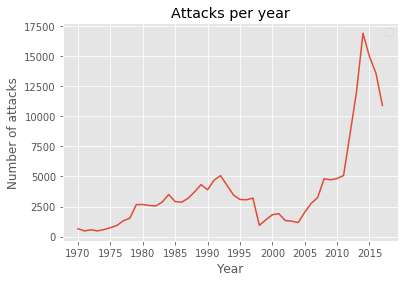

In [18]:
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
ax=attack_per_year.plot(x='Year',y='Attack_number')
ax.set_xticks(range(1970,2017,5))
ax.legend('')
plt.ylabel('Number of attacks')
plt.title('Attacks per year')
plt.show()

Observations:
    - Maximum attack is in 2014
    - Minimum attack is in 1971

# Number of Terrorist activities by Region

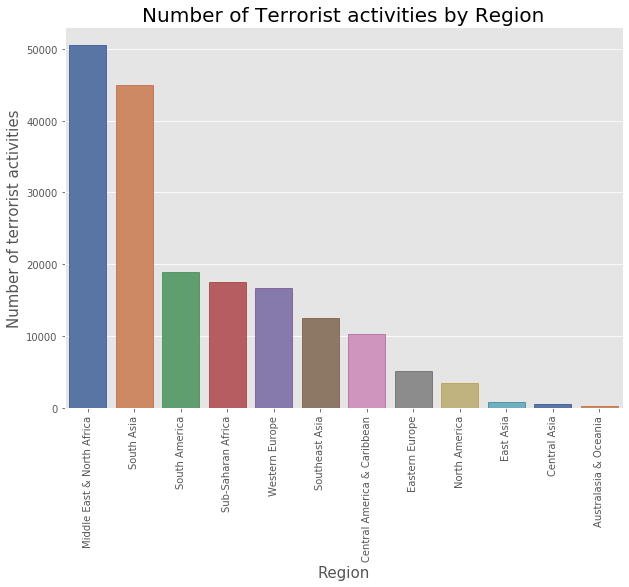

In [19]:
plt.subplots(figsize=(10,7))
sns.countplot('Region',data=df1,palette='deep',edgecolor=sns.color_palette("dark", 10),order=df1['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Terrorist activities by Region',fontsize=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of terrorist activities',fontsize=15)
plt.show()

# Casualities per year

In [20]:
df1.head(1)

,Year,Month,Day,Country,Region,State,City,Suicide,Success,Attack_Type,...,Motive,weaptype1_txt,Target,weaptype2_txt,weaptype3_txt,weaptype4_txt,Killed,Wounded,propextent_txt,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,0,1,Assassination,...,NaN,Unknown,Julio Guzman,NaN,NaN,NaN,1,0,NaN,1


In [21]:
casualities=df1[['Year','Casualities','Killed','Wounded']]

In [22]:
casualities=casualities.groupby('Year').sum().reset_index()

In [23]:
casualities.head(2)

,Year,Casualities,Killed,Wounded
0,1970,386,174,212
1,1971,255,173,82


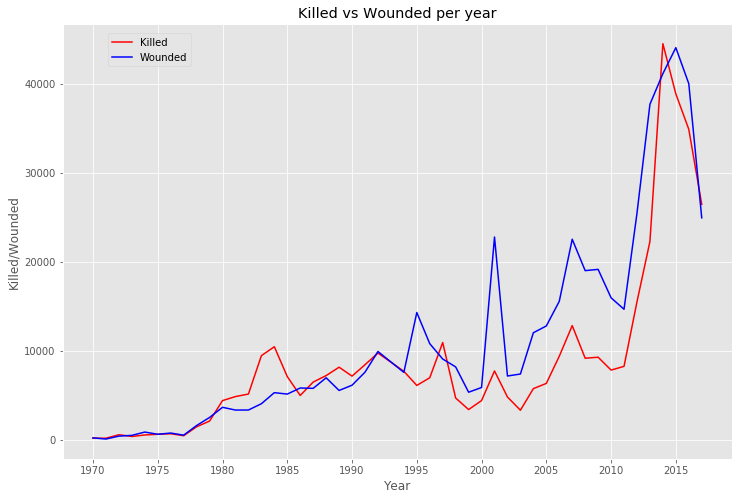

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('ggplot')
rects1=plt.plot(casualities['Year'],casualities['Killed'],color='red')
rects2=plt.plot(casualities['Year'],casualities['Wounded'],color='blue')

ax.set_xticks(range(1970,2017,5))
ax.legend((rects1[0], rects2[0]),('Killed', 'Wounded'),bbox_to_anchor=(0.20, 0.99))

plt.ylabel('Killed/Wounded')
plt.xlabel('Year')
ax.set_title('Killed vs Wounded per year')
plt.show()

From 1994, more people are wounded than killed. Number of wounded and killed people has reached its highest in 2014-2015.

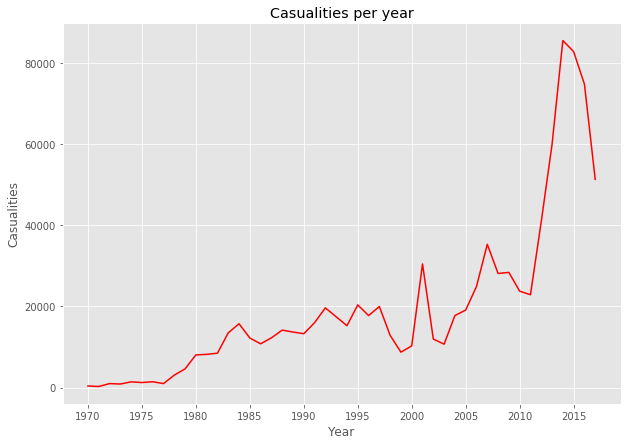

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(casualities['Year'],casualities['Casualities'],color='red')
ax.set_xticks(range(1970,2017,5))
plt.ylabel('Casualities')
plt.xlabel('Year')
plt.title('Casualities per year')
plt.show()

As we can see, the number of casualities has increased rapidly from 2011 till 2015 and then it started decreasing. The number of casualities was highest in the year 2014.

# Suicide per year

In [26]:
suicide=df1[['Year','Country','Suicide']]

In [27]:
suicide_per_year=suicide.groupby('Year').sum().reset_index()

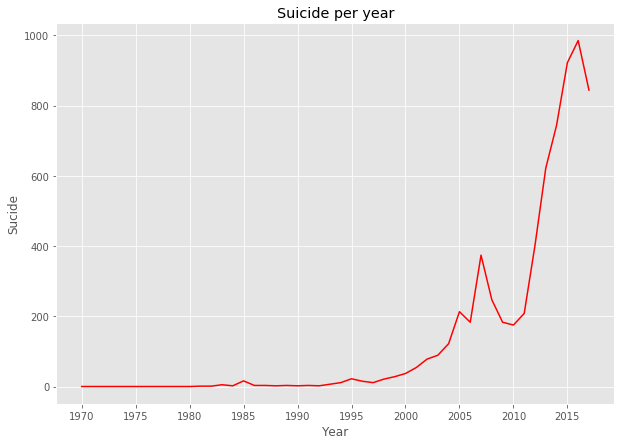

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(suicide_per_year['Year'],suicide_per_year['Suicide'],color='red')
ax.set_xticks(range(1970,2017,5))
plt.ylabel('Sucide')
plt.xlabel('Year')
plt.title('Suicide per year')
plt.show()

In [29]:
suicide_per_year

,Year,Suicide
0,1970,0
1,1971,0
2,1972,0
3,1973,0
4,1974,0
5,1975,0
6,1976,0
7,1977,0
8,1978,0
9,1979,0


As we can see, during the period of 1970-1980, there were no suicide cases and during 1981-1982, there were negligical number of sucide cases. But after that, it started to increase gradually and reached its highest at 2016.

In [30]:
suicide_per_country=suicide.groupby('Country').sum().reset_index().drop('Year',axis=1).sort_values(['Suicide'],ascending=False)

**Countries where there are no suicide cases**

In [31]:
suicide_per_country[suicide_per_country['Suicide']==0]

,Country,Suicide
144,Republic of the Congo,0
137,Paraguay,0
126,New Hebrides,0
138,People's Republic of the Congo,0
127,New Zealand,0
...,...,...
85,Ireland,0
88,Ivory Coast,0
89,Jamaica,0
90,Japan,0


In [32]:
suicide_per_country.head(10)

,Country,Suicide
84,Iraq,2602
0,Afghanistan,1228
134,Pakistan,511
130,Nigeria,389
175,Syria,344
200,Yemen,220
159,Somalia,188
86,Israel,130
167,Sri Lanka,114
102,Libya,109


These are the top 10 countries having maximum number of suicide cases. Iraq has the highest number of suicide cases.

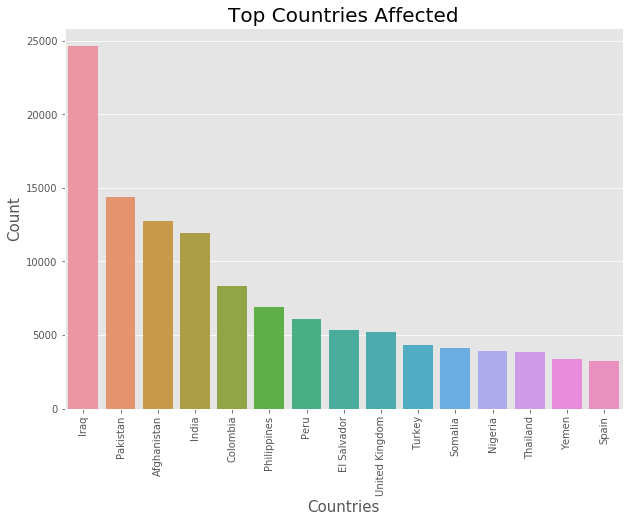

In [33]:
plt.subplots(figsize=(10,7))
sns.barplot(df1['Country'].value_counts()[:15].index,df1['Country'].value_counts()[:15].values)
sns.color_palette("Set2")
plt.title('Top Countries Affected',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

# Attack Type by Terrorist

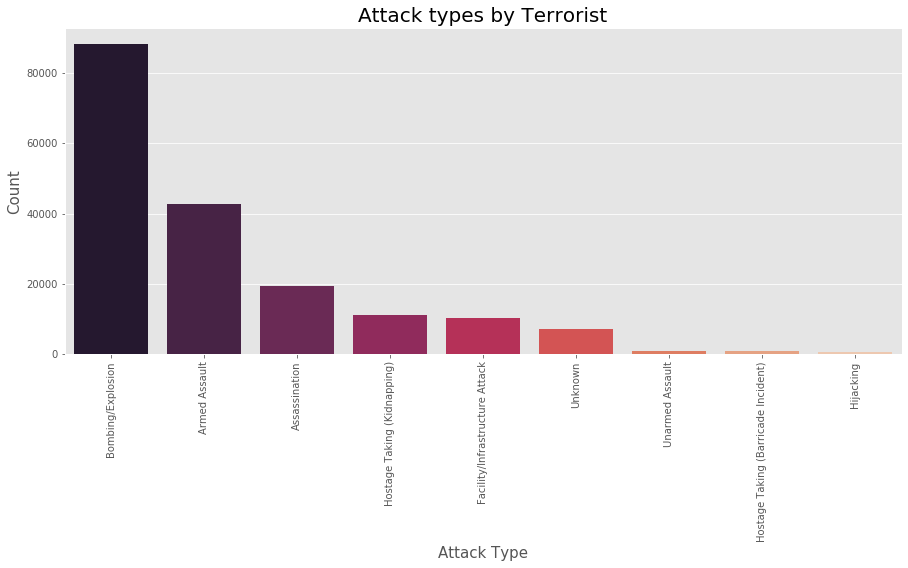

In [34]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack_Type',data=df1,palette='rocket',order=df1['Attack_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attack types by Terrorist',fontsize=20)
plt.xlabel('Attack Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Most popular attack type is bombing/explosion.